<a href="https://colab.research.google.com/github/rb4050/Deep-learning/blob/main/Binary_classification_in_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification with Keras

# Step 1 = Data ingestion

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_loan.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_loan.csv


In [3]:
df = pd.read_csv(url)
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


# step 2 = data quality check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
df.isna().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(58645, 13)

# step 3 = sep x and y(loan status)

drop id col = just a serial number


In [9]:
x = df.drop(columns=["id","loan_status"])
y = df[["loan_status"]]

In [10]:
x.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [11]:
y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [12]:
y.value_counts()

,count
loan_status,
0,50295
1,8350


<Axes: xlabel='loan_status'>

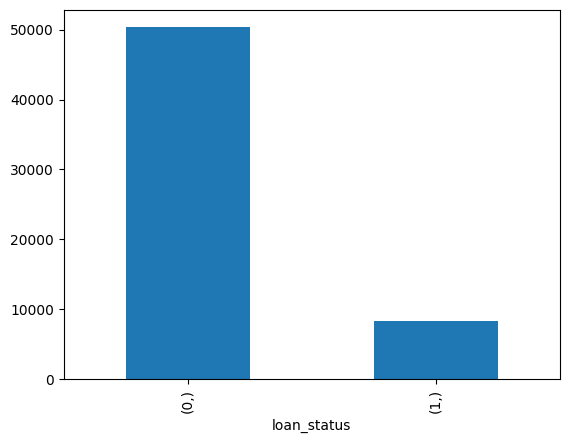

In [14]:
y.value_counts().plot(kind="bar")

# step 3  = apply preprocessing on x

In [15]:
x.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_percent_income,float64
cb_person_default_on_file,object


In [16]:
cat = list(x.columns[x.dtypes=="object"])
con = list(x.columns[x.dtypes!="object"])

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [25]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)


In [26]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False,drop="first")


)

In [27]:
pre = ColumnTransformer(
    [
        ("num",num_pipe,con),
        ("cat",cat_pipe,cat)
    ]
).set_output(transform="pandas")

In [28]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# step 5 = train test split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,test_size=0.2,random_state=42)

In [31]:
xtrain.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
14337,1.400450,-0.370311,-1.187200,-0.362625,1.045295,-0.209808,2.279989,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091305,-0.549585,-0.429576,-0.758041,0.323635,-0.427932,0.790845,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422806,0.156966,-1.187200,-0.218837,-0.921970,-0.536994,-0.698298,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55811,1.897701,0.288785,-0.682117,1.039305,-1.363533,0.444564,1.287227,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40120,-0.920057,-0.486311,0.075506,-0.937775,-0.994465,-0.755118,-0.946489,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
xtest.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
4657,-0.754307,-0.633949,-1.187200,-0.991696,-0.882427,-0.755118,-0.450108,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56440,-0.422806,-0.106673,1.085671,-0.758041,-0.688007,-0.864180,-0.450108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42117,0.737448,0.059419,-1.187200,1.937978,0.610322,1.098935,0.046274,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10849,-0.920057,-0.897587,-1.187200,-0.758041,-0.028957,0.117378,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39395,-0.091305,-0.106673,-0.934659,-0.398572,0.504874,-0.427932,1.039036,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
ytrain.head()

,loan_status
14337,0
17117,0
32590,0
55811,0
40120,0


In [35]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [36]:
xtrain.shape

(46916, 22)

In [37]:
xtest.shape

(11729, 22)

In [38]:
ytrain.shape

(46916, 1)

In [39]:
ytest.shape

(11729, 1)

In [45]:
xtrain.shape[1]

22

# step 6 = model building

In [44]:
from keras.models import Sequential
from keras.layers import Dense,Input,Dropout   # dropout = does not connect some neurons randomly
from keras.callbacks import EarlyStopping  # stop before overfitting of the model

In [46]:
model = Sequential(
    [
        Input(shape=(xtrain.shape[1],)),
        Dense(128,activation="relu"),
        Dropout(0.5),
        Dense(16,activation="relu"),
        Dropout(0.4),
        Dense(1,activation="sigmoid")
    ]
)

In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,025 (19.63 KB)

 Trainable params: 5,025 (19.63 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [50]:
es = EarlyStopping(patience=10,restore_best_weights=True)

In [51]:
hist = model.fit(xtrain,ytrain,validation_split=0.2,epochs=200,callbacks=[es])

Epoch 1/200
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8585 - loss: 0.3491 - val_accuracy: 0.9204 - val_loss: 0.2296
Epoch 2/200
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9167 - loss: 0.2427 - val_accuracy: 0.9288 - val_loss: 0.2120
Epoch 3/200
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9227 - loss: 0.2283 - val_accuracy: 0.9347 - val_loss: 0.2027
Epoch 4/200
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9291 - loss: 0.2189 - val_accuracy: 0.9357 - val_loss: 0.1986
Epoch 5/200
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9346 - loss: 0.2078 - val_accuracy: 0.9387 - val_loss: 0.1947
Epoch 6/200
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9354 - loss: 0.2066 - val_accuracy: 0.9408 - val_loss: 0.1929
Epoch 7/200
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9374 - loss: 0.1998 - val_accuracy: 0.9409 - val_loss: 0.1903
Epoch 8/200
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9361 - loss: 0

In [52]:
model.evaluate(xtrain,ytrain)

1467/1467 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9487 - loss: 0.1712


[0.1726691871881485, 0.9489513039588928]

In [53]:
model.evaluate(xtest,ytest)

367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9506 - loss: 0.1716


[0.17601273953914642, 0.949271023273468]

In [55]:
import matplotlib.pyplot as plt

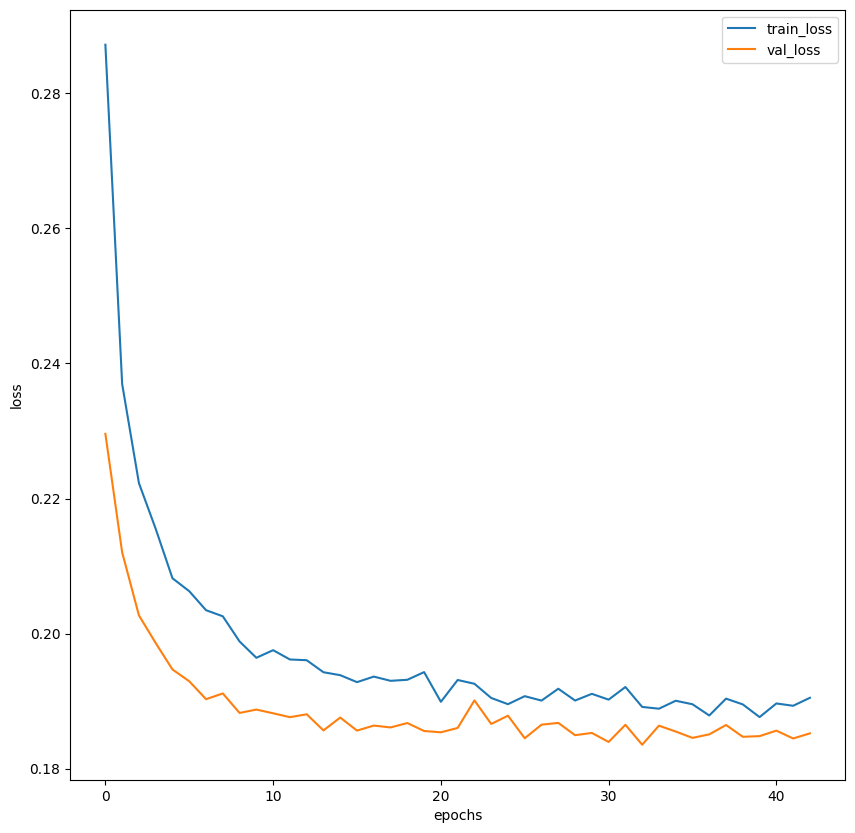

In [59]:
plt.figure(figsize=(10,10))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train_loss","val_loss"])
plt.show()

# training is done properly

# model evaluation

In [60]:
model.evaluate(xtrain,ytrain)

1467/1467 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9487 - loss: 0.1712


[0.1726691871881485, 0.9489513039588928]

In [61]:
model.evaluate(xtest,ytest)

367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9506 - loss: 0.1716


[0.17601273953914642, 0.949271023273468]

# Predictions for test data

In [62]:
ypred_test = model.predict(xtest)
ypred_test[0:5]

367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.0452892 ],
       [0.03656541],
       [0.06313391],
       [0.09378741],
       [0.04652976]], dtype=float32)

In [63]:
ypred_test = [1 if prob>= 0.5 else 0 for prob in ypred_test]
ypred_test[0:5]

[0, 0, 0, 0, 0]

In [64]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [65]:
from sklearn.metrics import ConfusionMatrixDisplay


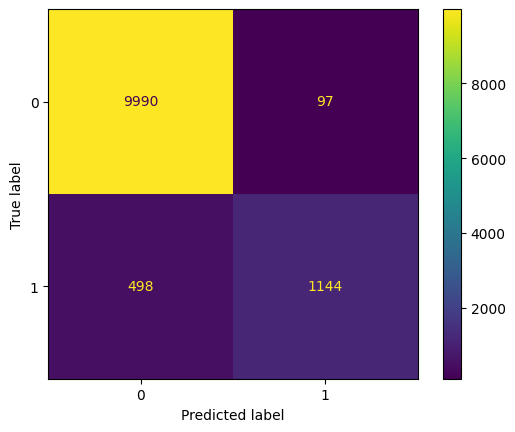

In [66]:
ConfusionMatrixDisplay.from_predictions(ytest,ypred_test)

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10087
           1       0.92      0.70      0.79      1642

    accuracy                           0.95     11729
   macro avg       0.94      0.84      0.88     11729
weighted avg       0.95      0.95      0.95     11729



In [69]:
from sklearn.metrics import RocCurveDisplay

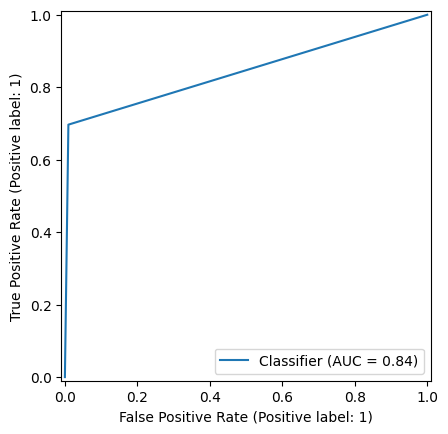

In [70]:
RocCurveDisplay.from_predictions(ytest,ypred_test)

# from above metrics we can say model is good as > 80

# step 8 = out of sample predictions

In [71]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_loan.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_loan.csv


In [72]:
xnew = pd.read_csv(url2)
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [73]:
xnew_pre = pre.transform(xnew)

In [74]:
xnew_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [75]:
probs = model.predict(xnew_pre)
probs[0:5]

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


array([[0.9987072 ],
       [0.02518536],
       [0.533841  ],
       [0.04893144],
       [0.12062453]], dtype=float32)

In [76]:
pred = [1 if p >=0.5 else 0 for p in probs]
pred[0:5]

[1, 0, 1, 0, 0]

In [77]:
res = xnew[["id"]]
res["loan_status"] = pred
res["probability"] = probs

<ipython-input-77-ea4b3572b0c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["loan_status"] = pred
<ipython-input-77-ea4b3572b0c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["probability"] = probs


In [78]:
res.head()

,id,loan_status,probability
0,58645,1,0.998707
1,58646,0,0.025185
2,58647,1,0.533841
3,58648,0,0.048931
4,58649,0,0.120625


In [81]:
res = res.round(4)

In [82]:
res

,id,loan_status,probability
0,58645,1,1.00
1,58646,0,0.03
2,58647,1,0.53
3,58648,0,0.05
4,58649,0,0.12
...,...,...,...
39093,97738,0,0.08
39094,97739,0,0.01
39095,97740,0,0.02
39096,97741,0,0.23


In [83]:
res["loan_status"].value_counts()

,count
loan_status,
0,35075
1,4023


<Axes: xlabel='loan_status'>

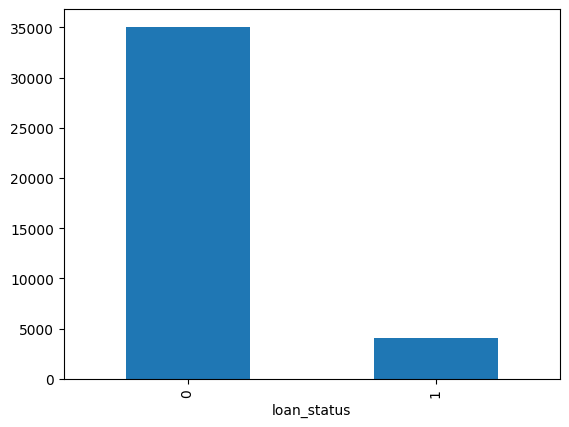

In [84]:
res["loan_status"].value_counts().plot(kind="bar")

In [87]:
res.to_csv("loan_results.csv",index=False)

# save preproceesor and model object

In [85]:
import joblib

In [86]:
joblib.dump(pre,"binpre.joblib")

['binpre.joblib']

In [88]:
model.save("loan_model.keras")

In [89]:
## load model

In [90]:
p = joblib.load("binpre.joblib")

In [91]:
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [92]:
from keras.models import load_model

In [93]:
m = load_model("loan_model.keras")

In [94]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,077 (58.90 KB)

 Trainable params: 5,025 (19.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,052 (39.27 KB)